In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy import integrate
from scipy import interpolate

In [2]:
#path = "/Users/argelia/Documents/Trabajo/TrabajoNestor/Data/Blok_McGaugh_Rubin_2001/"
#data = np.loadtxt(path+"ESO3020120.dat")
path="/Users/namh2/OneDrive/Documentos/DOCTORADO/AJUSTES Y ERRORES LANE-EMDEN/Blok_McGaugh_Rubin_2001/"
data=np.loadtxt(path+"U11616.dat")
#path="/Users/namh2/Downloads/anterior/ajusteTOV/"
#data=np.loadtxt(path+"datos.txt")

In [3]:
RCr_data = np.array([row[1] for row in data])# galactocentric distance [kpc]
RCv_data = np.array([row[5] for row in data])# rotation velocity [km/s]
RCev_data = np.array([row[6] for row in data])# error in rotation velocity [km/s]

Text(0.5, 0, 'r[kpc]')

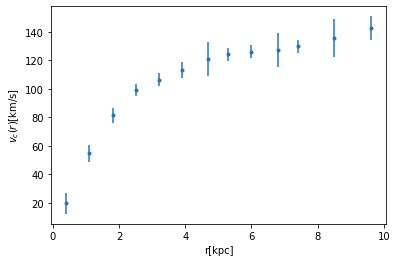

In [4]:
plt.errorbar(RCr_data,RCv_data,yerr=RCev_data,fmt='.')
plt.ylabel(r'$v_{c}(r)$[km/s]')
plt.xlabel("r[kpc]")

In [142]:
def Integrate(func,x0,y0,x,h):
    # Finds value of y for a given x using step size h 
    # and initial value y0 at x0.
    def RK4(func,x0,y0,h):
        K0 = h*func(x0,y0)
        K1 = h*func(x0 + 0.5*h, y0 + 0.5*K0)
        K2 = h*func(x0 + 0.5*h, y0 + 0.5*K1)
        K3 = h*func(x0 + h, y0 + K2)
        return (K0 + 2.*K1 + 2.*K2 + K3)/6.
    X = []
    Y = []
    X.append(x0)
    Y.append(y0)
    #while x0 < x:
    while y0[0] < 6.500000000000:
    #while y0[0]>0.99:
        y0 = y0 + RK4(func,x0,y0,h) #update next value of y
        x0 = x0 + h #update next value of x
        X.append(x0)
        Y.append(y0)
    return np.array(X),np.array(Y)

In [143]:
def rhs(x,y):
    dy=np.zeros(2)
    dy[0]=4*np.pi*Gm*x**2*(y[1]/K)
    dy[1]=-Gp*y[0]/x**2*(y[1]/K)
    return dy

In [144]:
def model(data,v,X):
    V = []
    x=X
    RC=v*np.sqrt(G)
    Int_l = interpolate.interp1d(x,RC)   #,fill_value='extrapolate')
    for i in range(len(data)):
        if data[i] < x[-1]:
            v=Int_l(data[i])
            V.append(v)
        else:
            #v=0.
            v=np.sqrt(G*Y[:,0][-1]/(data[i]))
            V.append(v)
    return V,RC 

In [145]:
def Xi2(RCv_data,RCv_teo,RCev_data):
    xi=np.sum((RCv_data-RCv_teo)**2./(RCev_data)**2.)
    return xi

In [146]:
Gm=2.5188027*10**(-3)
Gp=0.499246*10**(-6)
G=4.258*10**(4)
Gv=1.24*10**(5)
y0=np.zeros(2)
h=0.001
x0=0.00001

In [147]:
#K_min=2*10**(-7)
#K_max=0.5*10**(-6)
K_min=1.1*10**(-8)
K_max=30.*10**(-8)
Kvec=np.linspace(K_min,K_max,40)
#p_0min=5.*10**(-12)
#p_0max=7.*10**(-6)
p_0min=1.*10**(-8)
p_0max=60.*10**(-8)
p_0=np.linspace(p_0min,p_0max,40)

In [148]:
y0[0]=0.
y0[1]=p_0[0]
K=K_min

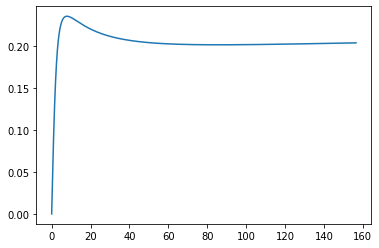

In [149]:
X,Y=Integrate(rhs,x0,y0,10.,h)
v=np.sqrt(Y[:,0]/X)
plt.plot(X,v)

Text(0.5, 0, 'R[kpc]')

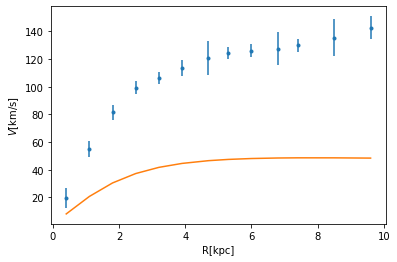

In [150]:
V,RC=model(RCr_data,v,X)
plt.errorbar(RCr_data,RCv_data,yerr=RCev_data,fmt='.')
plt.plot(RCr_data,V)
plt.ylabel(r'$V$[km/s]')
plt.xlabel("R[kpc]")

In [151]:
%%time
xi_minimo=10000
xi = np.zeros((len(p_0),len(Kvec)))
for l in range(0,len(Kvec)):
    K=Kvec[l]
    for i in range(0,len(p_0)):
        x0=0.00001
        y0[0]=0.
        y0[1]=p_0[i]
        X,Y=Integrate(rhs,x0,y0,10.,h)
        v=np.sqrt(Y[:,0]/X)
        V,RC=model(RCr_data,v,X)
        xi[i,l]=Xi2(RCv_data,V,RCev_data)
        if (xi[i,l] < xi_minimo):
            xi_minimo=xi[i,l]
            p0_minimo=p_0[i]
            K_minimo=Kvec[l]

Wall time: 18min 58s


4.767822898432184
7.76923076923077e-08
4.638461538461538e-07
[array(11.97990731), array(32.76421162), array(53.05568979), array(72.5790165), array(91.10807189), array(108.47464089), array(126.76200079), array(139.34151912), array(152.78331156), array(166.55988986), array(175.83427052), 180.46520564624268, 169.81158947001492]
[0.00000000e+00 3.02747359e-02 6.02497468e-02 ... 1.85172751e+02
 1.85185954e+02 1.85199155e+02]
[1.00000e-05 1.01000e-03 2.01000e-03 ... 8.06901e+00 8.07001e+00
 8.07101e+00]


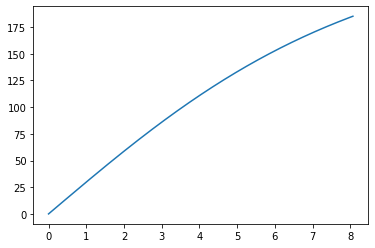

In [153]:
print(xi_minimo)
print(K_minimo)
print(p0_minimo)
print(V)
print(RC)
print(X)
plt.plot(X,RC)

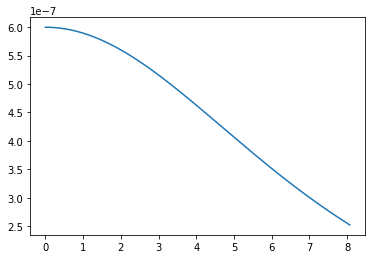

In [154]:
plt.plot(X,Y[:,1])

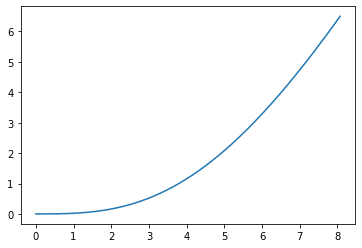

In [155]:
plt.plot(X,Y[:,0])

In [156]:
y0[0]=0.
y0[1]=p0_minimo
K=K_minimo

Text(0.5, 0, 'R[kpc]')

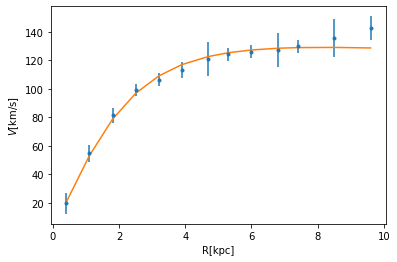

In [157]:
X,Y=Integrate(rhs,x0,y0,10.,h)
v=np.sqrt(Y[:,0]/X)
V,RC=model(RCr_data,v,X)
plt.errorbar(RCr_data,RCv_data,yerr=RCev_data,fmt='.')
p=plt.plot(RCr_data,V)
plt.ylabel(r'$V$[km/s]')
plt.xlabel("R[kpc]")

In [158]:
xi2=np.zeros((len(p_0),len(Kvec)))
for i in range(0,len(p_0)):
    for j in range (0,len(Kvec)):
        xi2_minimo=10000
        if (xi[i,j] < xi2_minimo):
            xi2_minimo=xi[i,j]
            xi2[i,j]=xi[i,j]

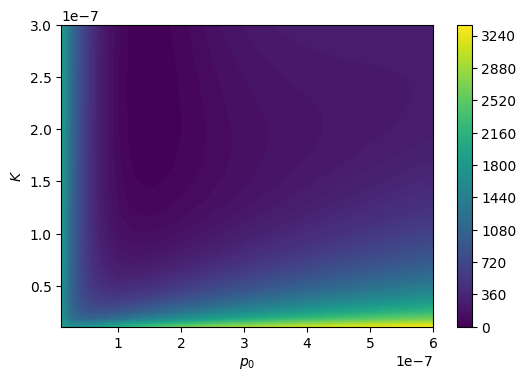

In [159]:
x,y = np.meshgrid(p_0,Kvec)
fig = plt.figure(dpi=100)
plt.contourf(x,y,xi2,100,cmap='viridis')
plt.xlabel(r'$p_0$')
plt.ylabel(r'$K$')
plt.colorbar();

In [160]:
xicl = np.zeros((len(p_0),len(Kvec)))
for l in range(0,len(p_0)):
    for j in range(0,len(Kvec)):
        #if ((xin[l,j] ) <= 0.02029568018541897+3.53):
        if ((xi2[l,j] ) <= 20.):
            xicl[l,j]=xi2[l,j]

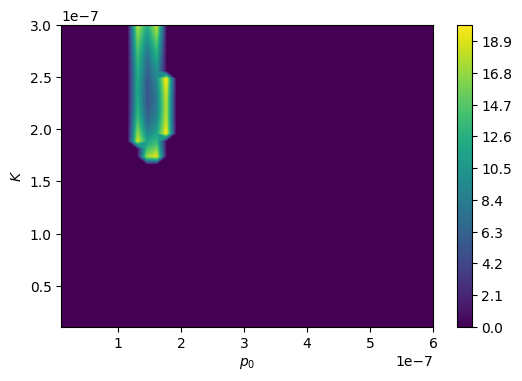

In [161]:
x,y = np.meshgrid(p_0,Kvec)
fig = plt.figure(dpi=100)
plt.contourf(x,y,xicl,200,cmap='viridis')
plt.xlabel(r'$p_0$')
plt.ylabel(r'$K$')
plt.colorbar();